In [90]:
# -*- coding: UTF-8 -*-
from sklearn import linear_model
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


In [91]:
def linearModel(data):
    """
    线性回归模型建模步骤
    参数
    ----
    data: DataFrame 建模数据 
    """
    features = ['x']
    labels = ['y']
    # 划分训练集和测试集
    trainData = data[:15]
    testData = data[15:]
    # 产生并训练模型
    model = trainModel(trainData,features,labels)
    # 评价模型效果
    error, score = evaluateModel(model,testData,features,labels)
    # 图形化模型效果
    visualizeModel(model,data,features,labels,error,score)

In [92]:
def trainModel(trainData,features,labels):
    """
    利用训练数据，估计模型参数
    
    参数
    ----
    trainData: DataFrame,训练数据集,包含特征和标签
    features: 特征名列表 
    labels: 标签名列表 
    
    返回
    ----
    model: LinearRegression,训练好的线性模型 
    """
    # 创建一个线性回归模型
    model = linear_model.LinearRegression()
    model.fit(trainData[features],trainData[labels])
    return model

In [93]:
def evaluateModel(model,testData,features,labels):
    """
    计算线性模型的均方差和决定系数
    
    参数 
    ----
    model: LinearRegression, 训练完成后的线性模型
    testData: DataFrame, 测试数据 
    features: list[str], 特征名列表 
    labels: list[str], 标签名列表 
    
    返回
    --- 
    error: np.float64, 均方差 
    score: np.float64 决定系数
    """
    error = np.mean(
        (model.predict(testData[features]) - testData[labels]) ** 2)
    score = model.score(testData[features], testData[labels])
    
    return error, score

In [94]:
def visualizeModel(model, data, features, labels, error, score):
    """
    模型可视化
    """
    # 为在Matplotlib中显示中文，设置特殊字体
    plt.rcParams['font.sans-serif']=['SimHei']
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里只画一幅图
    ax = fig.add_subplot(111)
    # 在Matplotlib中显示中文，需要使用unicode
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.set_title(u'%s' % "线性回归示例")
    else:
        ax.set_title(u'%s' % "线性回归示例".decode("utf-8"))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    # 画点图，用蓝色圆点表示原始数据
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.scatter(data[features], data[labels], color='b',
            label=u'%s: $y = x + \epsilon$' % "真实值")
    else:
        ax.scatter(data[features], data[labels], color='b',
            label=u'%s: $y = x + \epsilon$' % "真实值".decode("utf-8"))
    # 根据截距的正负，打印不同的标签
    if model.intercept_ > 0:
        # 画线图，用红色线条表示模型结果
        # 在Python3中，str不需要decode
        if sys.version_info[0] == 3:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ + %.3f'\
                % ("预测值", model.coef_, model.intercept_))
        else:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ + %.3f'\
                % ("预测值".decode("utf-8"), model.coef_, model.intercept_))
    else:
        # 在Python3中，str不需要decode
        if sys.version_info[0] == 3:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ - %.3f'\
                % ("预测值", model.coef_, abs(model.intercept_)))
        else:
            ax.plot(data[features], model.predict(data[features]), color='r',
                label=u'%s: $y = %.3fx$ - %.3f'\
                % ("预测值".decode("utf-8"), model.coef_, abs(model.intercept_)))
    legend = plt.legend(shadow=True)
    legend.get_frame().set_facecolor('#6F93AE')
    # 显示均方差和决定系数
    # 在Python3中，str不需要decode
    if sys.version_info[0] == 3:
        ax.text(0.99, 0.01, 
            u'%s%.3f\n%s%.3f'\
            % ("均方差：", error, "决定系数：", score),
            style='italic', verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, color='m', fontsize=13)
    else:
         ax.text(0.99, 0.01, 
            u'%s%.3f\n%s%.3f'\
            % ("均方差：".decode("utf-8"), error, "决定系数：".decode("utf-8"), score),
            style='italic', verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, color='m', fontsize=13)
    # 展示上面所画的图片。图片将阻断程序的运行，直至所有的图片被关闭
    # 在Python shell里面，可以设置参数"block=False"，使阻断失效。
    plt.show()


In [95]:
def saveModel(model,modelPath):
    """
    模型持久化
    
    参数
    -----
    model: 训练好的模型
    path: 持久化的路径 
    """
    pickle.dump(model,open(modelPath,"wb"))
    

In [96]:
def loadModel(modelPath):
    """
    使用pickle读取已有模型
    """
    return pickle.load(open(modelPath,"wb"))

In [97]:
def readData(path):
    """
    使用pandas读取数据
    """
    data = pd.read_csv(path,error_bad_lines=False)
    return data 


/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/clarence/Library/Python/3.7/lib/p

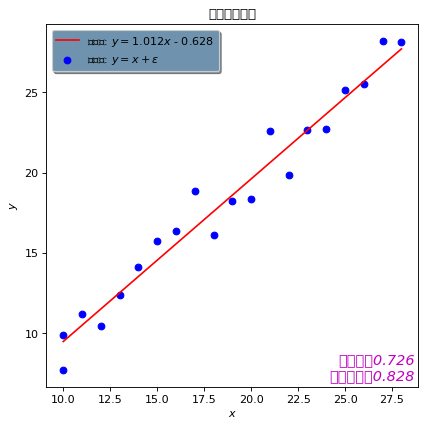

IsADirectoryError: [Errno 21] Is a directory: '/Users/clarence/Documents/data/'

In [98]:
if __name__ == "__main__":
    data = readData("simple_example.csv")
    linearModel(data)
    